In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("house_data_complete.csv")
#print(data)

In [2]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        mu[i] = np.mean(X[:,i])
        sigma[i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i]-mu[i])/sigma[i]
    return X_norm, mu, sigma

In [3]:
def computeCostMulti(X, y, theta, lamda):
    m = y.shape[0]
    J = (1/(2*m))*np.dot(np.transpose(np.dot(X,theta)-y),np.dot(X,theta)-y) + ((lamda/(2*m))*np.sum(np.dot(theta,theta)))
    return J

In [4]:
def gradientDescentMulti(X, y, theta, lamda, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = [] 
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta*(1-(alpha*lamda)/m)-((alpha/m)*(np.dot(X.T,sumofh0x-y)))
        J_history.append(computeCostMulti(X, y, theta, lamda))
    return theta, J_history

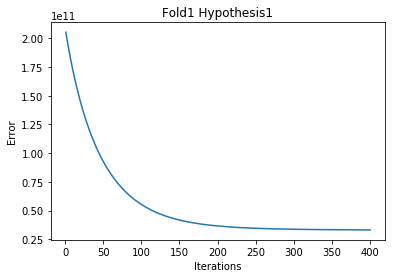

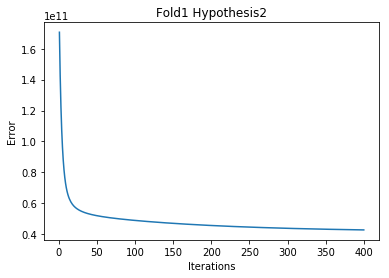

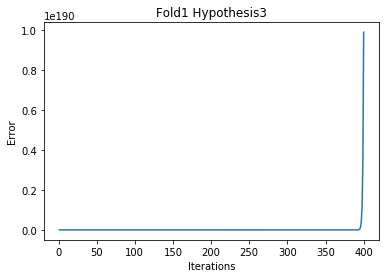

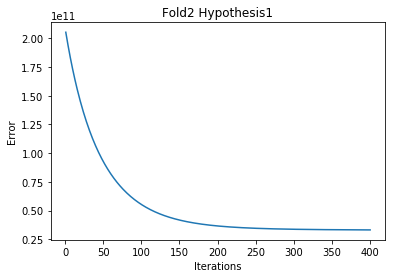

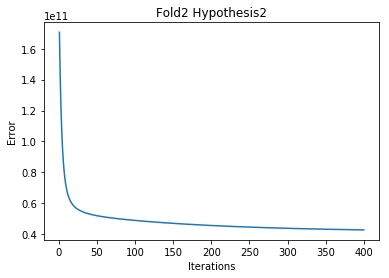

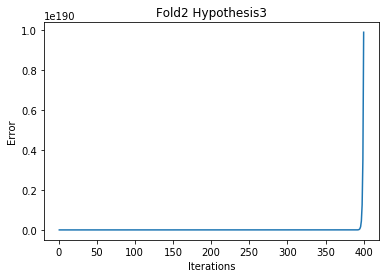

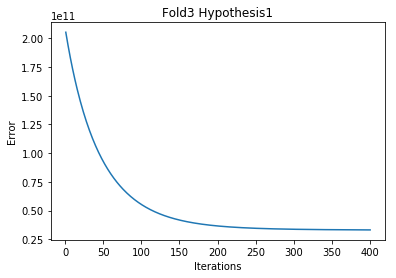

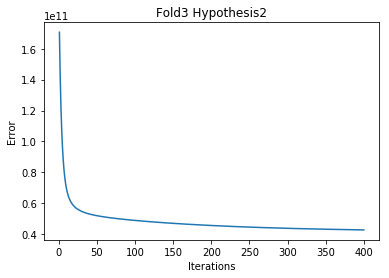

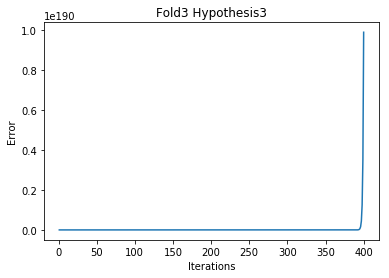

In [5]:
for j in range(3):
    training_data,validation_data,testing_data = np.split(data,[int(.6*len(data)), int(.8*len(data))])
    for i in range(3):
        X = np.array(training_data[['bedrooms','bathrooms','floors','view','condition','yr_built','sqft_living15']])
        y = np.array(training_data['price'])
        X_norm, mu, sigma = featureNormalize(X)
        X = np.concatenate([np.ones((X.shape[0], 1)), X_norm], axis=1)
        lamda = 1
        alpha = 0.01
        num_iters = 400
        theta = np.zeros(8)
        theta, J_history = gradientDescentMulti(np.power(X,(i+1)), y, theta, lamda, alpha, num_iters)
        #X_testing = np.array(testing_data[['bedrooms','bathrooms','floors','view','condition']])
        #y_testing = np.array(testing_data['price'])
        #X_norm_testing, mu_testing, sigma_testing = featureNormalize(X_testing)
        #X_testing = np.concatenate([np.ones((X_testing.shape[0], 1)), X_norm_testing], axis=1)
        #y_predicted = np.dot(X_testing,theta)
        number_of_iterations = np.arange(num_iters) + 1
        plt.figure()
        plt.plot(number_of_iterations,J_history)
        plt.title('Fold'+str(j+1)+' '+'Hypothesis'+str(i+1))
        plt.xlabel('Iterations')
        plt.ylabel('Error')

Text(0.5, 0, 'Number of bedrooms')

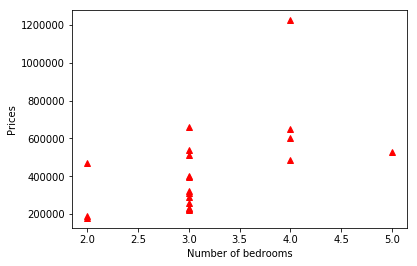

In [6]:
plt.plot(np.array(training_data["bedrooms"])[0:20],np.array(training_data["price"])[0:20],'r^')
plt.ylabel('Prices')
plt.xlabel('Number of bedrooms')

In [ ]:
#print(training_data)

In [ ]:
#print(testing_data)

In [ ]:
X = np.array(training_data[["grade","bedrooms","bathrooms","floors"]])
y = np.array(training_data["price"])

In [ ]:
X_norm, mu, sigma = featureNormalize(X)
#print(X.shape[1])
#print('Computed mean:', mu)
#print('Computed standard deviation:', sigma)
#print(X_norm)

In [ ]:
X = np.concatenate([np.ones((X.shape[0], 1)), X_norm], axis=1)
#print(X)

In [ ]:
#print(X)
#print(y.shape)

In [ ]:
alpha = 0.01
num_iters = 400
theta = np.zeros(5)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
#print(J_history)

In [ ]:
X_testing = np.array(testing_data[["grade","bedrooms","bathrooms","floors"]])
y_testing = np.array(testing_data["price"])

In [ ]:
X_norm_testing, mu_testing, sigma_testing = featureNormalize(X_testing)
X_testing = np.concatenate([np.ones((X.shape[0], 1)), X_norm], axis=1)
#print(X_testing)

In [ ]:
y_predicted_1 = np.dot(X_testing,theta)
y_predicted_2 = np.dot(X_testing**2,theta)
y_predicted_3 = np.dot(X_testing**3,theta)

In [ ]:
print(y_predicted_1)
print(y_predicted_2)
print(y_predicted_3)
print(y_testing)

In [ ]:
number_of_iterations = np.arange(num_iters) + 1
plt.plot(number_of_iterations,J_history)
plt.xlabel('Iterations')
plt.ylabel('Error')